In [15]:
from bs4 import BeautifulSoup
import requests
import re
import time
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.chrome.service import Service

options = webdriver.ChromeOptions()
options.add_experimental_option("excludeSwitches", ["enable-automation"])
options.add_experimental_option("useAutomationExtension", False)

### 네이버 뉴스 크롤링

In [8]:
# num 1, 11, 21, 31 ...만들어 주는 함수
def makePgNum(num):
    if num == 1:
        return num
    elif num == 0:
        return num + 1
    else:
        return num + 9 * (num - 1)

def makeUrl(start_pg, end_pg):
    if start_pg == end_pg:
        start_page = makePgNum(start_pg)
        url = "https://search.naver.com/search.naver?where=news&sm=tab_jum&query=%EB%9D%BC%EC%9D%B4%EB%94%A9+%7C+%EC%9E%90%EC%A0%84%EA%B1%B0&start=" + str(
            start_page)
        print("생성url: ", url)
        return url
    else:
        urls = []
        for i in range(start_pg, end_pg + 1):
            page = makePgNum(i)
            url = "https://search.naver.com/search.naver?where=news&sm=tab_jum&query=%EB%9D%BC%EC%9D%B4%EB%94%A9+%7C+%EC%9E%90%EC%A0%84%EA%B1%B0&start=" + str(page)
            urls.append(url)
        print("생성url: ", urls)
        return urls

In [9]:
page = int(input("\n크롤링할 시작 페이지를 입력해주세요 : "))
print("\n크롤링할 시작 페이지: ", page)

page2 = int(input("\n크롤링할 종료 페이지를 입력해주세요 : ")) 
print("\n크롤링할 종료 페이지: ", page2)

search_urls = makeUrl(page, page2)

driver = webdriver.Chrome(ChromeDriverManager().install())
driver.implicitly_wait(3)

naver_urls = []

for i in search_urls:
    driver.get(i)
    time.sleep(1)

    a = driver.find_elements(By.CSS_SELECTOR, 'a.info')

    # 위에서 생성한 css selector list 하나씩 클릭하여 본문 url얻기
    for i in a:
        i.click()

        driver.switch_to.window(driver.window_handles[1])
        time.sleep(3)

        # 네이버 뉴스 url만 가져오기
        url = driver.current_url
        print(url)

        if "news.naver.com" in url:
            naver_urls.append(url)

        else:
            pass

        driver.close()
        # 다시 처음 탭으로
        driver.switch_to.window(driver.window_handles[0])

print(naver_urls)

# ConnectionError방지
headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) Chrome/98.0.4758.102"}

news_content_list = []
for i in naver_urls:
    original_html = requests.get(i, headers=headers)
    html = BeautifulSoup(original_html.text, "html.parser")

    # 뉴스 본문 가져오기
    content = html.select("div#dic_area")

    # 기사 텍스트만 가져오기
    # list합치기
    content = ''.join(str(content))

    # html태그제거
    pattern1 = '<[^>]*>'
    
    content = re.sub(pattern=pattern1, repl='', string=content)
    pattern2 = """[\n\n\n\n\n// flash 오류를 우회하기 위한 함수 추가\nfunction _flash_removeCallback() {}"""
    content = content.replace(pattern2, '')

    news_content_list.append(content)

print(news_content_list)


크롤링할 시작 페이지를 입력해주세요. ex)1(숫자만입력):1

크롤링할 시작 페이지:  1 페이지

크롤링할 종료 페이지를 입력해주세요. ex)1(숫자만입력):2

크롤링할 종료 페이지:  2 페이지
생성url:  ['https://search.naver.com/search.naver?where=news&sm=tab_jum&query=%EB%9D%BC%EC%9D%B4%EB%94%A9+%7C+%EC%9E%90%EC%A0%84%EA%B1%B0&start=1', 'https://search.naver.com/search.naver?where=news&sm=tab_jum&query=%EB%9D%BC%EC%9D%B4%EB%94%A9+%7C+%EC%9E%90%EC%A0%84%EA%B1%B0&start=11']


C:\Users\tj\AppData\Local\Temp\ipykernel_11176\2726584299.py:11: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(ChromeDriverManager().install())


https://www.topstarnews.net/
https://www.jeonmae.co.kr/
https://www.jeonmae.co.kr/bannerpop/popup.html?win_popup_idxno=1542
https://www.econovill.com/
https://www.topstarnews.net/
https://www.weeklytrade.co.kr/main/index.html
https://www.hellot.net/index.html
https://www.travie.com/
https://www.sedaily.com/
https://n.news.naver.com/mnews/article/011/0004147749?sid=101
http://osen.mt.co.kr/
https://entertain.naver.com/read?oid=109&aid=0004778731
http://www.tf.co.kr/
https://n.news.naver.com/mnews/article/629/0000196750?sid=100
http://www.tf.co.kr/
https://n.news.naver.com/mnews/article/629/0000196750?sid=100
http://www.jnilbo.com/
https://www.ize.co.kr/
https://entertain.naver.com/read?oid=465&aid=0000006271
https://www.mhns.co.kr/
http://www.newsworker.co.kr/
https://www.topstarnews.net/
http://www.ksilbo.co.kr/
https://newsis.com/
https://n.news.naver.com/mnews/article/003/0011650935?sid=101
https://www.metroseoul.co.kr/
https://www.newsen.com/
['https://n.news.naver.com/mnews/article

### 네이버 블로그 크롤링

In [13]:
driver=webdriver.Chrome('chromedriver.exe')
url='https://search.naver.com/search.naver?sm=tab_hty.top&where=blog&query=%EB%9D%BC%EC%9D%B4%EB%94%A9+%7C+%EC%9E%90%EC%A0%84%EA%B1%B0&oquery=%EB%9D%BC%EC%9D%B4%EB%94%A9&tqi=h9Bn2dprvxZssiQET8KssssstLd-336687&nso=so%3Ar%2Cp%3A6m'
# 블로그에 라이딩 또는 자전거 검색
driver.get(url)
time.sleep(2)

C:\Users\tj\AppData\Local\Temp\ipykernel_11176\1110926582.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver=webdriver.Chrome('chromedriver.exe')


In [16]:
before_h=driver.execute_script('return window.scrollY')
for i in range(0,1): #스크롤 다섯 번 내리기
    driver.find_element(By.CSS_SELECTOR,'body').send_keys(Keys.END)
    time.sleep(1)
    after_h=driver.execute_script('return window.scrollY')
    if after_h==before_h:
        break
    before_h=after_h

In [17]:
soup = BeautifulSoup(driver.page_source, 'html.parser')
posts =soup.find_all("div", attrs={"class":"total_area"})

In [18]:
list_href = []

for post in posts:
    post_href = post.select_one('div.total_area > a').get('href')
    list_href.append(post_href)

In [19]:
content_list=[]
for url in list_href:
    try:
        driver.get(url)
        driver.switch_to.default_content()
        driver.switch_to.frame('mainFrame')
        soup = BeautifulSoup(driver.page_source, 'html.parser')
        post =soup.select_one("div.se-main-container").get_text()
        content=post.replace('\n','').replace('\u200b','').replace('ㅋ','')
    except:
        pass
    content_list.append(content)
    
driver.close()

In [20]:
content_list+=news_content_list

---

### 단어빈도시각화 (네이버뉴스,네이버블로그)

In [21]:
from konlpy.tag import Hannanum

hannanum = Hannanum()

In [22]:
temp = []
for i in range(len(content_list)):
    temp.append(hannanum.nouns(content_list[i]))

In [23]:
search_word=['라이딩','자전거'] #stop_word랑 같은 역할
def flatten(l):
    flatList = []
    for elem in l:
        if type(elem) == list:
            for e in elem:
                if e not in search_word:
                    flatList.append(e)
        else:
            if elem not in stop_words:
                    flatList.append(elem)
    return flatList

word_list=flatten(temp)

In [24]:
# 두글자 이상인 단어만 추출
word_list=pd.Series([x for x in word_list if len(x)>1])
word_list.value_counts().head(10)

자전거길     140
의원       106
여행        86
코스        76
금강        69
영상        64
이상        64
정도        60
전기자전거     60
시간        59
dtype: int64

In [25]:
from wordcloud import WordCloud
from collections import Counter

font_path = 'NanumBarunGothic.ttf'

wordcloud = WordCloud(
    font_path = font_path,
    width = 800,
    height = 800,
    background_color="white"
)

count = Counter(word_list)
wordcloud = wordcloud.generate_from_frequencies(count)

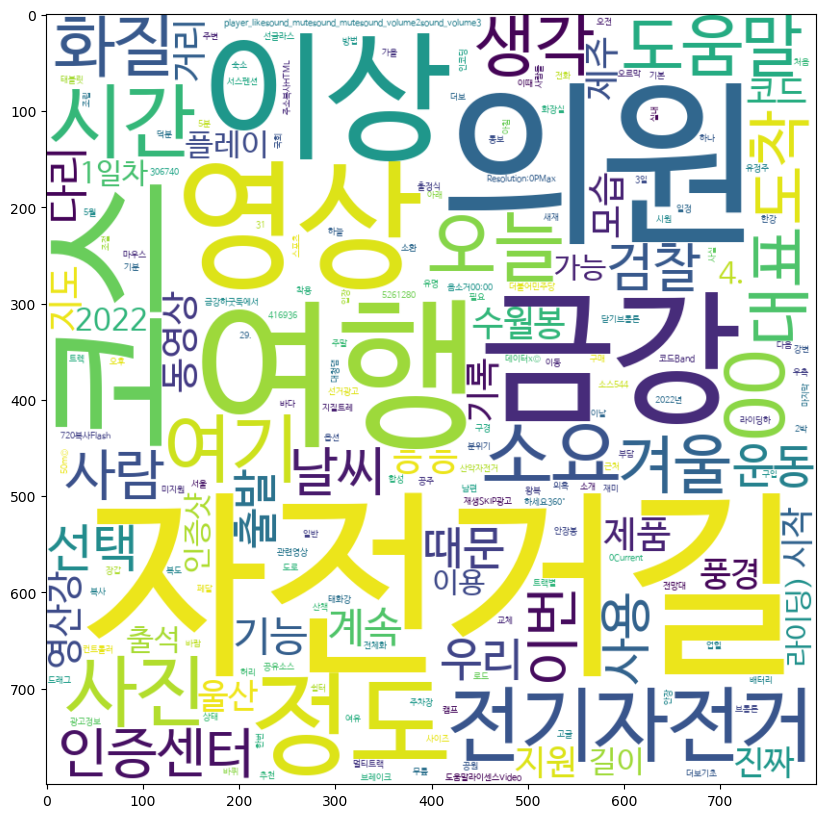

In [26]:
def __array__(self):
    """Convert to numpy array.
    Returns
    -------
    image : nd-array size (width, height, 3)
        Word cloud image as numpy matrix.
    """
    return self.to_array()

def to_array(self):
    """Convert to numpy array.
    Returns
    -------
    image : nd-array size (width, height, 3)
        Word cloud image as numpy matrix.
    """
    return np.array(self.to_image())
array = wordcloud.to_array()


import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10))
plt.imshow(array, interpolation="bilinear")
plt.show()
